In [1]:
import pde
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets

plt.rcParams['figure.figsize'] = [10, 10]
plt.style.use("ggplot")
plt.rcParams.update({'font.size': 12})

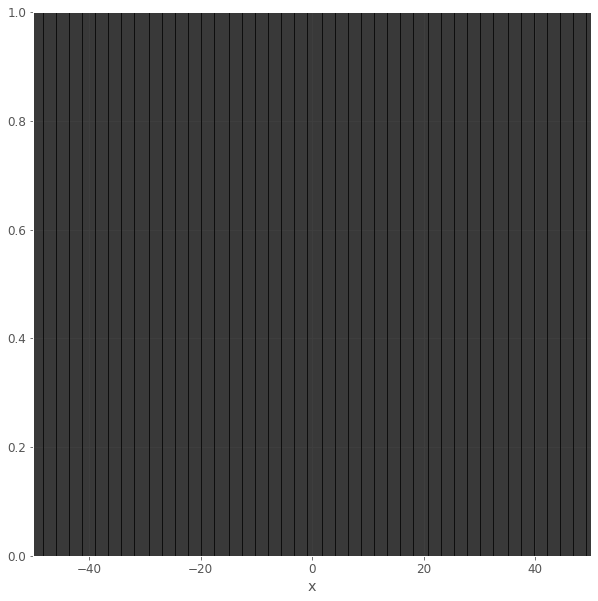

In [48]:
# příprava gridu
domain_size = 1.
grid_size = 300
#dx = domain_size/(grid_size+1)

max_time= 100
dt = 0.01
tracker_int = 0.1

#iv_size = 40 #  průměr radiálně symetrické počáteční podmínky

grid = pde.CartesianGrid([[-50, 50]], grid_size)
grid.plot(action='show')

In [49]:
x = np.linspace(-50,50,grid_size)
x0 = np.zeros(grid_size) #np.exp(-1/(1-X[i]**2-Y[j]**2))

#x0 = 1.1-(2*x-1)**2
#x0 = .3
#x0 = x/3+.5
#x0[1:-1] = 2.*np.exp(-1/(1-x[1:-1]**2))+.1
x0 = 1/2+1/2*(np.tanh(1/(2*np.sqrt(2))*(x-(np.sqrt(2)*(0-1/2))*0)))
#x0[0]=x0[1]
#x0[-1]=x0[-2]
#x0 = np.sin(2*np.pi*x)
state = pde.ScalarField(grid,x0)
state.plot(action='show');

In [50]:
#řešení rovnice
eq = pde.PDE(
    {"u": "laplace(u) + u*(1-u)*(u-.3)"},
    #{"u": "laplace(u) + u*(1-u)"},
)

storage = pde.MemoryStorage()
tracker = ['progress', storage.tracker(interval=.1)] 

result = eq.solve(state, t_range=max_time, dt=dt, tracker=tracker)

In [51]:
t_size = len(storage.data)-1
def plot_wave(t):
    
    #x_size = len(storage.data[t][int(grid_size/2)])
    x = np.linspace(-1, 1, grid_size)#x_size)
    plt.plot(x,storage.data[t])
    plt.xlim([-1,1])
    plt.ylim([0,1.1])
    plt.show()

widgets.interactive(plot_wave, t=widgets.IntSlider(min=0, max=t_size, step=1, value=0))

interactive(children=(IntSlider(value=0, description='t', max=1000), Output()), _dom_classes=('widget-interact…

In [52]:
storage.data[]

[array([4.44089210e-16, 5.55111512e-16, 7.21644966e-16, 8.88178420e-16,
        1.16573418e-15, 1.44328993e-15, 1.83186799e-15, 2.33146835e-15,
        2.94209102e-15, 3.71924713e-15, 4.71844785e-15, 5.93969318e-15,
        7.54951657e-15, 9.54791801e-15, 1.21014310e-14, 1.53210777e-14,
        1.94289029e-14, 2.46469511e-14, 3.11972670e-14, 3.95239397e-14,
        5.00710584e-14, 6.33937347e-14, 8.03246358e-14, 1.01751940e-13,
        1.28896893e-13, 1.63313807e-13, 2.06890061e-13, 2.62068145e-13,
        3.32012196e-13, 4.20607993e-13, 5.32796030e-13, 6.74960088e-13,
        8.55038262e-13, 1.08313358e-12, 1.37212464e-12, 1.73822068e-12,
        2.20196084e-12, 2.78943535e-12, 3.53361784e-12, 4.47636372e-12,
        5.67063063e-12, 7.18358706e-12, 9.10010955e-12, 1.15279453e-11,
        1.46035961e-11, 1.84997573e-11, 2.34354203e-11, 2.96878633e-11,
        3.76084719e-11, 4.76422235e-11, 6.03529449e-11, 7.64548980e-11,
        9.68526925e-11, 1.22692578e-10, 1.55426394e-10, 1.968935

In [31]:
import numpy as np

t_size = 40
domain = 40
def nagumo(t,a):
    
    #x_size = len(storage.data[t][int(grid_size/2)])
    x = np.linspace(-domain, domain, 100)#x_size)
    #x = np.linspace(2, 3, 100)#x_size)
    plt.plot(x,1/2+1/2*(np.tanh(1/(2*np.sqrt(2))*(x-(np.sqrt(2)*(a-1/2))*t))))
    plt.xlim([-domain,domain])
    #plt.xlim([2.8,3])
    plt.ylim([-4,4])
    plt.show()

widgets.interactive(nagumo, 
                    t=widgets.FloatSlider(min=0, max=t_size, step=.1, value=0),
                   a=widgets.FloatSlider(min=0, max=1, step=.1, value=0),)

interactive(children=(FloatSlider(value=0.0, description='t', max=40.0), FloatSlider(value=0.0, description='a…

In [26]:
1/2+1/2*(np.arctanh(1/(2*np.sqrt(2))*(3-(np.sqrt(2)*(0-1/2))*0)))

<ipython-input-26-f6eec2d041d6>:1: RuntimeWarning: invalid value encountered in arctanh
  1/2+1/2*(np.arctanh(1/(2*np.sqrt(2))*(3-(np.sqrt(2)*(0-1/2))*0)))


nan